In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
import numpy as np
import os
import csv
from scipy.signal import butter

label=[]
data=[]

a= pd.read_csv("심전도DB/1/1.csv",header=None)
df = pd.DataFrame(a)

# for row_index, row in a.iterrows():    
#     label.append(row.loc[1]) #row.ix[0] 더 이상 지원하지 않는다.    
#     other_data=[]
#     for v in row.loc[0]: 
#         other_data.append(v)
#     data.append(other_data)
df

,0,1
0,-5.00002,1.69717
1,-5.00000,1.69256
2,-4.99998,1.71417
3,-4.99996,1.70554
4,-4.99994,1.71812
...,...,...
499998,4.99994,2.23057
499999,4.99996,2.23518
500000,4.99998,2.22859
500001,5.00000,2.20054


In [38]:
list=df[1]
list

0         1.69717
1         1.69256
2         1.71417
3         1.70554
4         1.71812
           ...   
499998    2.23057
499999    2.23518
500000    2.22859
500001    2.20054
500002    2.21654
Name: 1, Length: 500003, dtype: float64

<AxesSubplot:>

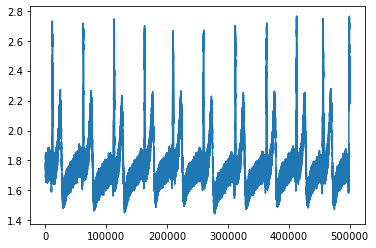

In [39]:
list.plot()

In [55]:
list1=np.arange(0,10.00006, 0.00002)
len(list1)
list1

array([0.000000e+00, 2.000000e-05, 4.000000e-05, ..., 1.000000e+01,
       1.000002e+01, 1.000004e+01])

In [56]:
list.values

array([1.69717, 1.69256, 1.71417, ..., 2.22859, 2.20054, 2.21654])

In [57]:
transfer=pd.Series(list.values, index=list1, name='data')
transfer

0.00000     1.69717
0.00002     1.69256
0.00004     1.71417
0.00006     1.70554
0.00008     1.71812
             ...   
9.99996     2.23057
9.99998     2.23518
10.00000    2.22859
10.00002    2.20054
10.00004    2.21654
Name: data, Length: 500003, dtype: float64

<AxesSubplot:>

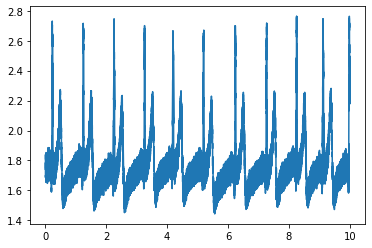

In [58]:
transfer.plot()

## 대역필터 첫번째 방법(signal.firwin)

In [61]:
b=signal.firwin(101, cutoff=[0.05,40], fs=50003, pass_zero='bandpass')
x1 = signal.lfilter(b,[1.0], transfer)

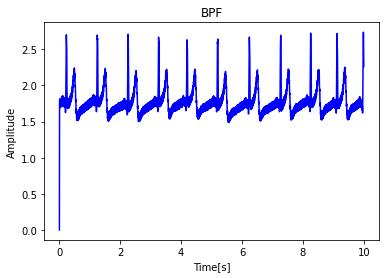

In [62]:
fig, ax1 = plt.subplots()
ax1.plot(list1, x1, color='b')

ax1.set_ylabel("Amplitude")
ax1.set_xlabel("Time[s]")
plt.title("BPF")
plt.show()

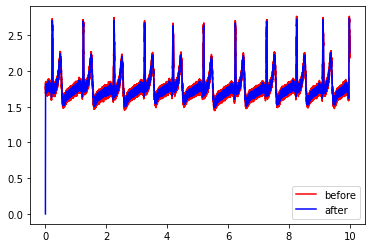

In [67]:
plt.plot(list1, list.values, color="r",label="before")
plt.plot(list1, x1, color='b', label="after")


# ax1.set_ylabel("Amplitude")
# ax1.set_xlabel("Time[s]")
plt.legend()
plt.show()

## 두번째 방법

In [ ]:
mat_file = scipy.io.loadmat('signal1.mat')
(file_path, file_id) = os.path.split('signal1.mat')  # file path, file name

fs = 50003  # sample rate
order = 101  # order
#cut_off_freq = 150  # cut off frequency

# raw signal
# t = np.linspace(0, 1, fs, False)  # 1 second
# sig = np.sin(2*np.pi*100*t) + np.sin(2*np.pi*50*t)  # signal
sig = mat_file[file_id[:-4]][0]

freq = np.fft.fftfreq(len(sig), 1/1024)

# filtered signal
sos = signal.butter(order, [cut_off_freq], 'low', fs=fs, output='sos')  # low pass filter
filtered = signal.sosfilt(sos, sig)

# raw signal fft
raw_fft = np.fft.fft(sig) / len(sig)
raw_fft_abs = abs(raw_fft)

# filter signal fft
filtered_fft = np.fft.fft(filtered) / len(filtered)
filtered_fft_abs = abs(filtered_fft)

# plot
fig, ((ax00, ax01), (ax10, ax11)) = plt.subplots(2, 2)

# raw signal plot : 0 row 0 column
ax00.plot(t, sig)
ax00.set_title('Raw Data Time Domain')
ax00.set_xlabel('Time [seconds]')
ax00.set_ylabel('Amplitude')

# filtered signal plot : 1 row 0 column
ax10.plot(t, filtered)
ax10.set_title('Filtered Data Time Domain')
ax10.set_xlabel('Time [seconds]')
ax10.set_ylabel('Amplitude')

# raw signal fft plot : 0 row 1 column
ax01.stem(freq, raw_fft_abs, use_line_collection=True)
ax01.set_title('Raw Data Frequency Domain')
ax01.set_xlabel('Frequency [HZ]')
ax01.set_ylabel('Amplitude')

# filtered signal fft plot : 1 row column
ax11.stem(freq,filtered_fft_abs, use_line_collection=True)
ax11.set_title('Filtered Data Frequency Domain')
ax11.set_xlabel('Frequency [HZ]')
ax11.set_ylabel('Amplitude')

# plot
plt.tight_layout()
plt.show()

In [ ]:

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


# BPF setting ( 나머지 주파수는 자르고 40 ~ 100 hz 만 추출하겠다.)
lowcut = 40.0
highcut = 100.0
    
# BPF
yy = butter_bandpass_filter(z, lowcut, highcut, Fs, order=5)

# 1. 원 신호 Plot
plt.plot(t, z, 'y', label='origin')

# 2. 필터 적용된 Plot
plt.plot(t, yy, 'b', label='filtered data')
plt.legend()
plt.show() 
    
# 3. 필터 적용된 FFT Plot
yf = np.fft.fft(yy) / N
yf = yf[range(int(N/2))]

plt.title("BPF")
plt.plot(freq, abs(yf), 'k')
plt.xlim(0, Fs / 20)
plt.show()

In [22]:
#df.drop(2, axis = 'columns')